In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [3]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
y_pred = kmeans.labels_

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

In [7]:
from sklearn.metrics import precision_score, recall_score

In [8]:
precision_score(y, y_pred, average='macro')

0.90718732314657613

In [9]:
recall_score(y, y_pred, average='macro')

0.8933333333333332

In [10]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    print("k=%d, silhueta=%f" % (k, silhouette_score(X, y_pred)))

k=2, silhueta=0.680814
k=3, silhueta=0.552592
k=4, silhueta=0.497826
k=5, silhueta=0.488518
k=6, silhueta=0.366504


In [11]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

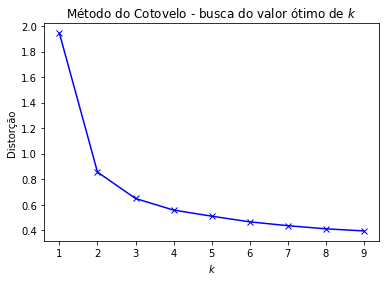

In [28]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(
        sum(
            np.min(
                cdist(X, kmeans.cluster_centers_, 'euclidean'), 
                axis=1)
        ) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('$k$')
plt.ylabel('Distorção')
plt.title('Método do Cotovelo - busca do valor ótimo de $k$')
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = 
train_test_split(X, y, test_size=0.3, random_state=1234)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
y_pred = knn.predict(X_test)

In [19]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]])

In [20]:
precision_score(y_test, y_pred, average='macro')

0.98148148148148151

In [21]:
recall_score(y_test, y_pred, average='macro')

0.97222222222222221

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 12]])

In [25]:
recall_score(y_test, y_pred, average='macro')

1.0

In [26]:
precision_score(y_test, y_pred, average='macro')

1.0

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)